In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# -----------------------------
# Reading the database
# -----------------------------
file_path = '/content/drive/My Drive/CURSOS LOS ANDES/CURSO MODELOS DE ANÁLISIS ESTADÍSTICO/Modelos de Análisis Estadístico material previo y libro guía/Modelos de Análisis Estadístico/datos_desercion.dta'
data = pd.read_stata(file_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9916 entries, 0 to 9915
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   deserta      9916 non-null   int8    
 1   promInicial  9916 non-null   float32 
 2   proced       9916 non-null   object  
 3   carrera      9916 non-null   object  
 4   Genero       9916 non-null   category
dtypes: category(1), float32(1), int8(1), object(2)
memory usage: 290.6+ KB


In [4]:
data['deserta']

0       1
1       0
2       0
3       1
4       0
       ..
9911    0
9912    0
9913    0
9914    1
9915    0
Name: deserta, Length: 9916, dtype: int8

In [5]:


import statsmodels.formula.api as smf
# -----------------------------
# Variable Declaration
# -----------------------------
# Converting variables to appropriate types
data['deserta'] = data['deserta'].astype('category')
data['promInicial'] = data['promInicial'].astype(float)
data['proced'] = data['proced'].astype('category')
data['carrera'] = data['carrera'].astype('category')
data['Genero'] = data['Genero'].astype('category')

# -----------------------------
# Estimating a logistic regression model

data['deserta'] = data['deserta'].cat.codes

# Now define your formula and fit the model
model_formula = 'deserta ~ promInicial + proced + carrera + Genero'
model = smf.logit(formula=model_formula, data=data).fit()
print(model.summary())# Extracting log-odds for 'promInicial'



Optimization terminated successfully.
         Current function value: 0.330042
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                deserta   No. Observations:                 9916
Model:                          Logit   Df Residuals:                     9910
Method:                           MLE   Df Model:                            5
Date:                Fri, 17 Nov 2023   Pseudo R-squ.:                  0.3975
Time:                        14:48:26   Log-Likelihood:                -3272.7
converged:                       True   LL-Null:                       -5432.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                14.9414      0.403     37.042      0.000      14.151      15.

In [6]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np


# Get the coefficient for 'promInicial'
log_odds_promInicial = model.params['promInicial']

# Calculate log-odds, odds, and probability changes for the first two observations
for i in range(2):  # Looping through the first two observations
    # Select the observation as a DataFrame and reset the index
    obs = data.iloc[i:i+1, :].reset_index(drop=True)

    # Calculate log-odds for the observation
    log_odds = model.predict(obs)[0]

    # Calculate odds
    odds = np.exp(log_odds)

    # Change in odds with one unit increase in 'promInicial'
    change_in_odds = odds * log_odds_promInicial

    # Probability for the observation
    prob = model.predict(obs)[0]

    # Change in probability with one unit increase in 'promInicial'
    change_in_prob = prob * (1 - prob) * log_odds_promInicial

    # Print the results
    print(f"Observation {i+1}:")
    print(f"  Log-Odds: {log_odds}, Odds: {odds}, Change in Odds: {change_in_odds}")
    print(f"  Probability: {prob}, Change in Probability: {change_in_prob}")

# Odds-ratio
odds_ratio = np.exp(log_odds_promInicial)

# Displaying results
print(f'Odds-ratio for promInicial: {odds_ratio}')


Observation 1:
  Log-Odds: 0.5236093274988833, Odds: 1.688109607635245, Change in Odds: -8.276964808230778
  Probability: 0.5236093274988833, Change in Probability: -1.223041211115814
Observation 2:
  Log-Odds: 0.08650775621096611, Odds: 1.0903598247458117, Change in Odds: -5.34613976302882
  Probability: 0.08650775621096611, Change in Probability: -0.3874631269026249
Odds-ratio for promInicial: 0.007423558193487546


In [7]:
# Function to get the mode (most common category) of a column
def getmode(series):
    return series.mode()[0]

# Calculate the average case for marginal effects
x_prom = pd.DataFrame({
    'promInicial': [data['promInicial'].mean()],
    'proced': [getmode(data['proced'])],
    'carrera': [getmode(data['carrera'])],
    'Genero': [getmode(data['Genero'])]
})

# Marginal effects for the average case
avg_case_margeff = model.get_margeff(at='mean', atexog=x_prom).summary_frame()
print("Marginal Effects for the Average Case:")
print(avg_case_margeff)

# Calculate the marginal effects across all data
marg_eff = model.get_margeff().summary_frame()
print("\nAverage Marginal Effects:")
print(marg_eff)

# Calculate and display the average marginal effect of 'promInicial'
avg_marginal_effect_promInicial = marg_eff.loc['promInicial', 'dy/dx']
print(f"\nAverage Marginal Effect of 'promInicial': {avg_marginal_effect_promInicial}")


Marginal Effects for the Average Case:
                          dy/dx  Std. Err.          z      Pr(>|z|)  \
proced[T.OTROS]        0.021178   0.006806   3.111569  1.860958e-03   
carrera[T.Economia]    0.043364   0.017190   2.522608  1.164883e-02   
carrera[T.Ingenieria]  0.108729   0.013800   7.878730  3.307252e-15   
Genero[T.M]            0.053363   0.006944   7.684774  1.532674e-14   
promInicial           -0.489917   0.012249 -39.995746  0.000000e+00   

                       Conf. Int. Low  Cont. Int. Hi.  
proced[T.OTROS]              0.007838        0.034518  
carrera[T.Economia]          0.009672        0.077056  
carrera[T.Ingenieria]        0.081681        0.135777  
Genero[T.M]                  0.039753        0.066972  
promInicial                 -0.513925       -0.465909  

Average Marginal Effects:
                          dy/dx  Std. Err.          z      Pr(>|z|)  \
proced[T.OTROS]        0.021960   0.007035   3.121384  1.800032e-03   
carrera[T.Economia]    0.0449

In [8]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np


# Fitting a logistic regression model with an interaction term
model_inter_formula = 'deserta ~ promInicial + proced + carrera + Genero + promInicial:Genero'
model_inter = smf.logit(formula=model_inter_formula, data=data).fit()
print(model_inter.summary())

# Calculating odds ratios for specific observations
# For the interaction, we'll calculate it for different levels of 'Genero'
# Replace 'Genero1' with the actual name of your dummy variable for 'Genero'

# Odds-ratio for observation with 'Genero' at its baseline level
odds_ratio_women = np.exp(model_inter.params['promInicial']) * \
                   np.exp(model_inter.params.get('promInicial:Genero[T.YourCategory]', 0) * 0)
print(f"Odds-ratio for women (baseline level of Genero): {odds_ratio_women}")

# Odds-ratio for observation with 'Genero' at its other level
# This assumes 'Genero' is binary; adjust as needed for your data
odds_ratio_men = np.exp(model_inter.params['promInicial']) * \
                 np.exp(model_inter.params.get('promInicial:Genero[T.YourCategory]', 0) * 1)
print(f"Odds-ratio for men (other level of Genero): {odds_ratio_men}")


Optimization terminated successfully.
         Current function value: 0.329492
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                deserta   No. Observations:                 9916
Model:                          Logit   Df Residuals:                     9909
Method:                           MLE   Df Model:                            6
Date:                Fri, 17 Nov 2023   Pseudo R-squ.:                  0.3985
Time:                        14:48:27   Log-Likelihood:                -3267.2
converged:                       True   LL-Null:                       -5432.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  17.1323      0.810     21.148      0.000      15.545   

In [9]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

# Assuming 'data' is already defined

# Fitting a reduced logistic regression model
model_reduced_formula = 'deserta ~ Genero + carrera + promInicial'
model_reduced = smf.logit(formula=model_reduced_formula, data=data).fit()
print(model_reduced.summary())

# Calculating Odds-Ratios with Confidence Intervals
params_reduced = model_reduced.params
conf_reduced = model_reduced.conf_int()
conf_reduced['OR'] = params_reduced
conf_reduced.columns = ['2.5%', '97.5%', 'OR']
odds_ratios_reduced = np.exp(conf_reduced)
print("\nOdds Ratios with Confidence Intervals (Reduced Model):")
print(odds_ratios_reduced)


Optimization terminated successfully.
         Current function value: 0.330529
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                deserta   No. Observations:                 9916
Model:                          Logit   Df Residuals:                     9911
Method:                           MLE   Df Model:                            4
Date:                Fri, 17 Nov 2023   Pseudo R-squ.:                  0.3966
Time:                        14:48:27   Log-Likelihood:                -3277.5
converged:                       True   LL-Null:                       -5432.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                14.9868      0.403     37.193      0.000      14.197      15.

In [10]:
import numpy as np
import statsmodels.api as sm

# -----------------------------
# Model Fit Measures
# -----------------------------

# Log-likelihood of the model
log_likelihood = model.llf
print(f'Log-Likelihood: {log_likelihood}')

# Global significance test (Likelihood Ratio Test) for the full model
lr_test_full = model.llr_pvalue
print(f'Likelihood Ratio Test p-value (Full Model): {lr_test_full}')

# For individual significance tests, we can use the summary
print("\nIndividual Coefficient Significance:")
print(model.summary())

# Confidence intervals for coefficients
conf_int = model.conf_int()
print("\nConfidence Intervals for Coefficients:")
print(conf_int)

# Calculating Odds-Ratios with Confidence Intervals
params = model.params
conf = model.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
odds_ratios = np.exp(conf)
print("\nOdds Ratios with Confidence Intervals:")
print(odds_ratios)

# For reduced model (if applicable)
# Replace 'model_reduced' with your reduced model
if 'model_reduced' in locals():
    conf_int_reduced = model_reduced.conf_int()
    params_reduced = model_reduced.params
    conf_int_reduced['OR'] = params_reduced
    conf_int_reduced.columns = ['2.5%', '97.5%', 'OR']
    odds_ratios_reduced = np.exp(conf_int_reduced)
    print("\nOdds Ratios with Confidence Intervals (Reduced Model):")
    print(odds_ratios_reduced)

    # Hypothesis testing for reduced model (if applicable)
    # Replace hypothesis with your specific hypothesis
    # Example: hypothesis = 'carreraEconomia = carreraIngenieria'
    # hypothesis_test = model_reduced.wald_test(hypothesis)
    # print(f"\nHypothesis Test Result (Reduced Model): {hypothesis_test}")

# Note: In Python, Wald tests are typically used for hypothesis testing on coefficients.


Log-Likelihood: -3272.6948128874023
Likelihood Ratio Test p-value (Full Model): 0.0

Individual Coefficient Significance:
                           Logit Regression Results                           
Dep. Variable:                deserta   No. Observations:                 9916
Model:                          Logit   Df Residuals:                     9910
Method:                           MLE   Df Model:                            5
Date:                Fri, 17 Nov 2023   Pseudo R-squ.:                  0.3975
Time:                        14:48:27   Log-Likelihood:                -3272.7
converged:                       True   LL-Null:                       -5432.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                14.9414      0.403     37.042      0.000 

In [11]:
import scipy.stats
# Comparación entre modelos

# Fitting the complete model with interaction terms
model_complete_formula = 'deserta ~ Genero * carrera * promInicial'
model_complete = smf.logit(formula=model_complete_formula, data=data).fit()
print(model_complete.summary())

# Fitting the reduced model without interaction terms
model_reduced_formula = 'deserta ~ Genero + carrera + promInicial'
model_reduced = smf.logit(formula=model_reduced_formula, data=data).fit()
print(model_reduced.summary())

# Comparing the two models using a likelihood ratio test
lr_stat = 2 * (model_complete.llf - model_reduced.llf)  # LR statistic
df = model_complete.df_model - model_reduced.df_model  # Degrees of freedom
p_value = scipy.stats.chi2.sf(lr_stat, df)  # P-value

# Calculating McFadden's Pseudo R-squared
def pseudo_r2(model):
    llf = model.llf
    llnull = model.llnull
    return 1 - (llf / llnull)

pseudo_r2_complete = pseudo_r2(model_complete)
pseudo_r2_reduced = pseudo_r2(model_reduced)

print(f"\nMcFadden's Pseudo R-squared (Complete Model): {pseudo_r2_complete}")
print(f"McFadden's Pseudo R-squared (Reduced Model): {pseudo_r2_reduced}")

Optimization terminated successfully.
         Current function value: 0.329624
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                deserta   No. Observations:                 9916
Model:                          Logit   Df Residuals:                     9904
Method:                           MLE   Df Model:                           11
Date:                Fri, 17 Nov 2023   Pseudo R-squ.:                  0.3983
Time:                        14:48:27   Log-Likelihood:                -3268.6
converged:                       True   LL-Null:                       -5432.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                             

In [12]:
## Comparemos algunos modelos que pueden construirse con estos datos


# Define and fit the models
model1 = smf.logit('deserta ~ carrera', data=data).fit()
print(model1.summary())
lr_stat1 = model1.llr  # Likelihood Ratio Statistic
p_value1 = scipy.stats.chi2.sf(lr_stat1, df=model1.df_model)
print(f"Likelihood Ratio Test (Model 1): LR Statistic = {lr_stat1}, p-value = {p_value1}")

model2 = smf.logit('deserta ~ Genero', data=data).fit()
print(model2.summary())
lr_stat2 = model2.llr
p_value2 = scipy.stats.chi2.sf(lr_stat2, df=model2.df_model)
print(f"Likelihood Ratio Test (Model 2): LR Statistic = {lr_stat2}, p-value = {p_value2}")

model3 = smf.logit('deserta ~ promInicial', data=data).fit()
print(model3.summary())
lr_stat3 = model3.llr
p_value3 = scipy.stats.chi2.sf(lr_stat3, df=model3.df_model)
print(f"Likelihood Ratio Test (Model 3): LR Statistic = {lr_stat3}, p-value = {p_value3}")

# Compare models using AIC and BIC
aic_values = [model1.aic, model2.aic, model3.aic]
bic_values = [model1.bic, model2.bic, model3.bic]

print(f"\nAIC Values: {aic_values}")
print(f"BIC Values: {bic_values}")

# Determine the best model based on AIC and BIC
best_model_aic = min(aic_values)
best_model_bic = min(bic_values)
print(f"Best model based on AIC: {'Model 1' if best_model_aic == aic_values[0] else 'Model 2' if best_model_aic == aic_values[1] else 'Model 3'}")
print(f"Best model based on BIC: {'Model 1' if best_model_bic == bic_values[0] else 'Model 2' if best_model_bic == bic_values[1] else 'Model 3'}")



Optimization terminated successfully.
         Current function value: 0.535897
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                deserta   No. Observations:                 9916
Model:                          Logit   Df Residuals:                     9913
Method:                           MLE   Df Model:                            2
Date:                Fri, 17 Nov 2023   Pseudo R-squ.:                 0.02177
Time:                        14:48:27   Log-Likelihood:                -5314.0
converged:                       True   LL-Null:                       -5432.2
Covariance Type:            nonrobust   LLR p-value:                 4.414e-52
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.2405      0.109    -20.541      0.000      -2.454      -2.

In [13]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
# Function to plot ROC curve
def plot_roc_curve(model, data, title):
    # Get actual and predicted values
    actual = data['deserta']
    predicted_prob = model.predict(data)

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(actual, predicted_prob)
    roc_auc = auc(fpr, tpr)

    # Plot
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {title}')
    plt.legend(loc='lower right')
    plt.show()

    return roc_auc


Confusion Matrix for Model 1:
[[ 874 6690]
 [  93 2259]]



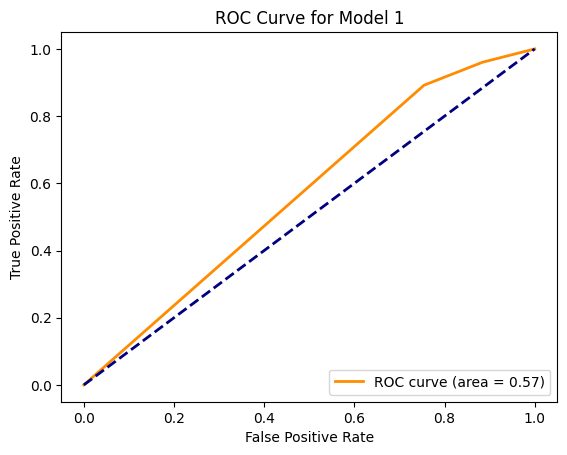

AUC for Model 1: 0.5701413415048727

Confusion Matrix for Model 2:
[[   0 7564]
 [   0 2352]]



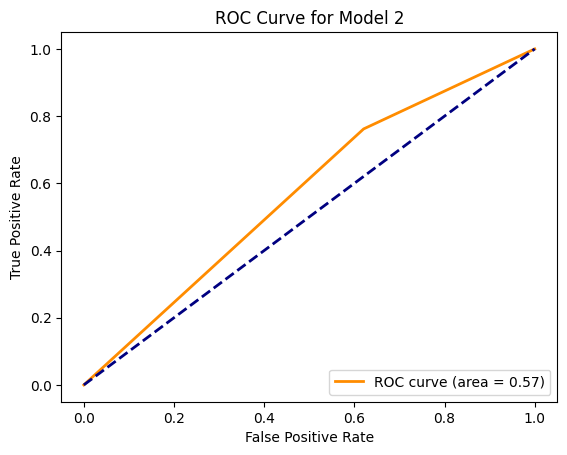

AUC for Model 2: 0.5706668177583037

Confusion Matrix for Model 3:
[[4635 2929]
 [ 148 2204]]



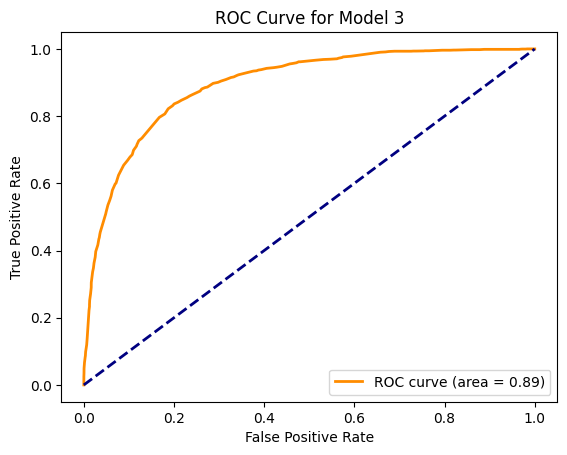

AUC for Model 3: 0.8935545926461541



In [14]:
# Evaluate models
models = [model1, model2, model3]
model_names = ['Model 1', 'Model 2', 'Model 3']

for i, model in enumerate(models):
    # Confusion Matrix
    predictions = (model.predict(data) >= 0.1).astype(int)
    cm = confusion_matrix(data['deserta'], predictions)
    print(f'Confusion Matrix for {model_names[i]}:\n{cm}\n')

    # Plot ROC curve and calculate AUC
    auc_value = plot_roc_curve(model, data, model_names[i])
    print(f'AUC for {model_names[i]}: {auc_value}\n')

In [15]:
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score

# Function to find the optimal threshold for the highest F1 score
def find_optimal_threshold(model, data):
    actual = data['deserta']
    predicted_prob = model.predict(data)

    # Calculate ROC curve components
    fpr, tpr, thresholds_roc = roc_curve(actual, predicted_prob)
    sensitivity = tpr
    specificity = 1 - fpr

    # Calculate Precision-Recall curve components
    precision, recall, thresholds_pr = precision_recall_curve(actual, predicted_prob)

    # Calculate F1 score for each threshold
    f1_scores = [f1_score(actual, predicted_prob >= t) for t in thresholds_pr]

    # Find the optimal threshold
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds_pr[optimal_idx]
    optimal_f1 = f1_scores[optimal_idx]

    return optimal_threshold, sensitivity[optimal_idx], specificity[optimal_idx], precision[optimal_idx], optimal_f1

# Evaluate models
models = [model1, model2, model3]
model_names = ['Model 1', 'Model 2', 'Model 3']

for i, model in enumerate(models):
    optimal_threshold, sensitivity, specificity, precision, optimal_f1 = find_optimal_threshold(model, data)
    print(f"{model_names[i]}:")
    print(f"  Optimal Threshold: {optimal_threshold}")
    print(f"  Sensitivity: {sensitivity}")
    print(f"  Specificity: {specificity}")
    print(f"  Precision: {precision}")
    print(f"  Optimal F1 Score: {optimal_f1}\n")


Model 1:
  Optimal Threshold: 0.26880204996796747
  Sensitivity: 0.9604591836734694
  Specificity: 0.11554732945531465
  Precision: 0.26880204996796925
  Optimal F1 Score: 0.41311410849660335

Model 2:
  Optimal Threshold: 0.27628738822078297
  Sensitivity: 0.7619047619047619
  Specificity: 0.37942887361184563
  Precision: 0.27628738822078325
  Optimal F1 Score: 0.4055216112242589

Model 3:
  Optimal Threshold: 0.34662302675444334
  Sensitivity: 0.9370748299319728
  Specificity: 0.6127710206240085
  Precision: 0.6496960486322189
  Optimal F1 Score: 0.6861958266452649



In [16]:
from sklearn.metrics import confusion_matrix

# Function to create a confusion matrix at a given threshold
def create_confusion_matrix(model, data, threshold):
    actual = data['deserta']
    predicted_prob = model.predict(data)
    predicted = (predicted_prob >= threshold).astype(int)
    cm = confusion_matrix(actual, predicted)
    return cm

# Optimal thresholds from the previous step
optimal_thresholds = [0.2047682, 0.2197763, 0.2311404]

# Evaluate models
models = [model1, model2, model3]
model_names = ['Model 1', 'Model 2', 'Model 3']

for i, model in enumerate(models):
    cm = create_confusion_matrix(model, data, optimal_thresholds[i])
    print(f'Confusion Matrix for {model_names[i]} (Threshold: {optimal_thresholds[i]}):')
    print(cm)
    print()


Confusion Matrix for Model 1 (Threshold: 0.2047682):
[[1857 5707]
 [ 254 2098]]

Confusion Matrix for Model 2 (Threshold: 0.2197763):
[[2870 4694]
 [ 560 1792]]

Confusion Matrix for Model 3 (Threshold: 0.2311404):
[[6049 1515]
 [ 385 1967]]



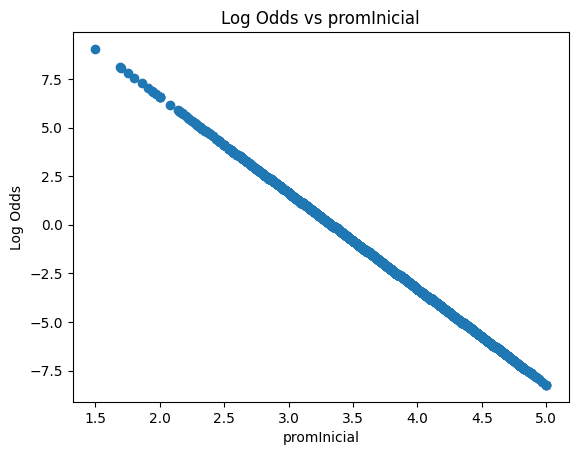

In [25]:
# Use a scatter plot of the predicted log odds against the continuous predictors
for variable in ['promInicial']:  # Replace with your continuous predictors
    fitted_vals = model.predict()
    log_odds = np.log(fitted_vals / (1 - fitted_vals))
    plt.scatter(data[variable], log_odds)
    plt.xlabel(variable)
    plt.ylabel('Log Odds')
    plt.title(f'Log Odds vs {variable}')
    plt.show()

<ipython-input-27-3a04b9faf8e9>:9: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(len(deviance_residuals)), deviance_residuals, use_line_collection=True)


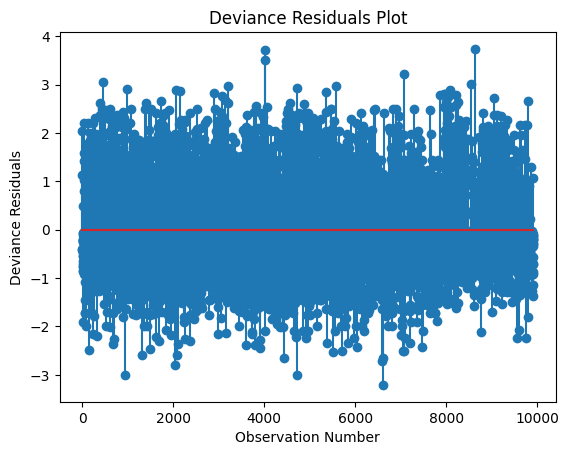

In [27]:
# Fit the model using GLM
glm_formula = 'deserta ~ promInicial + proced + carrera + Genero'
glm_model = sm.GLM.from_formula(glm_formula, data=data, family=sm.families.Binomial()).fit()

# Deviance residuals
deviance_residuals = glm_model.resid_deviance

# Plot the deviance residuals
plt.stem(np.arange(len(deviance_residuals)), deviance_residuals, use_line_collection=True)
plt.xlabel('Observation Number')
plt.ylabel('Deviance Residuals')
plt.title('Deviance Residuals Plot')
plt.show()

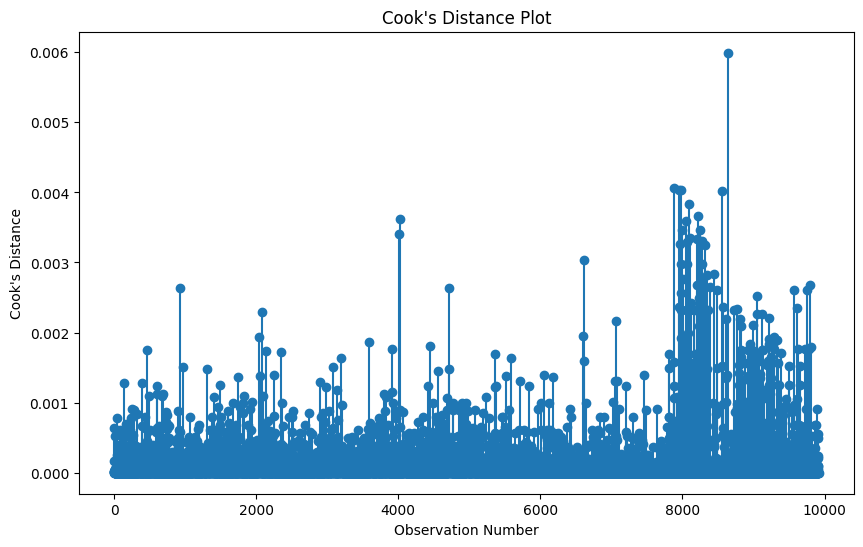

In [28]:
# Cook's Distance
influence = glm_model.get_influence()
cooks = influence.cooks_distance[0]

# Plot Cook's distance
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks)), cooks, linefmt='-', markerfmt='o', basefmt=' ')
plt.xlabel('Observation Number')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show()

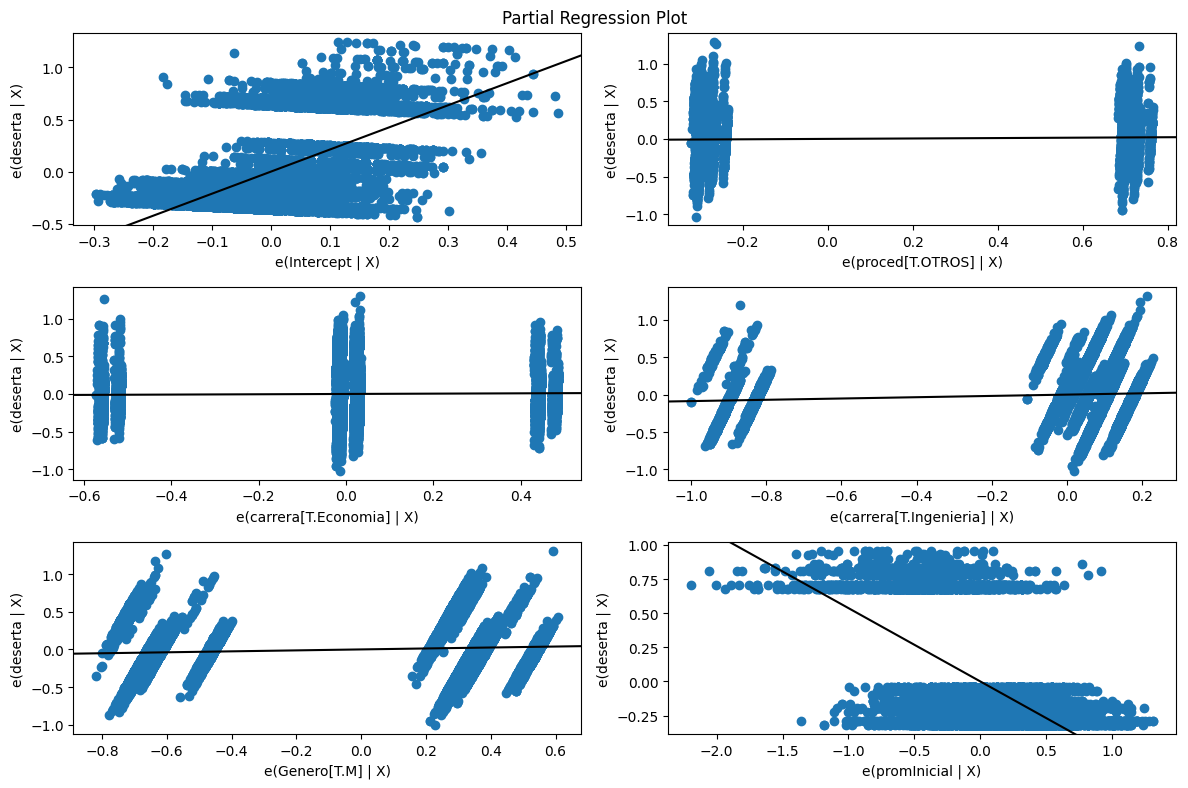

In [29]:
# Checking for linearity in the logit can be done by inspecting the partial regression plots
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_partregress_grid(glm_model, fig=fig)
plt.show()

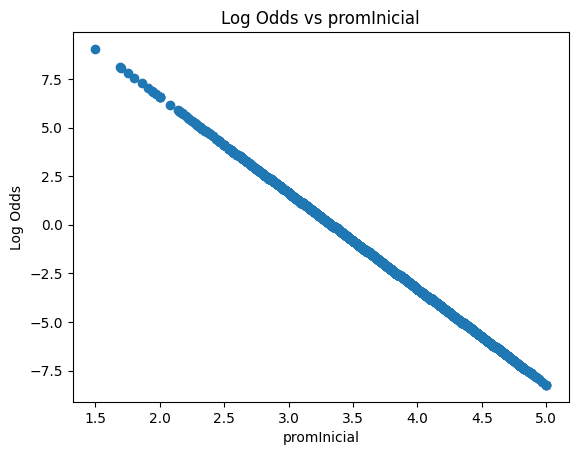

In [30]:
# Calculate predicted log odds (logit transformation of predicted probabilities)
predicted_probs = model.predict(data)
log_odds = np.log(predicted_probs / (1 - predicted_probs))

# Plot the continuous independent variable against the log odds
plt.scatter(data['promInicial'], log_odds)
plt.xlabel('promInicial')
plt.ylabel('Log Odds')
plt.title('Log Odds vs promInicial')
plt.show()